In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [8]:
X, y = mnist['data'], mnist['target']
y = y.astype(np.uint8)
X_train, X_test, y_train, y_test = X.iloc[:60000], X.iloc[60000:], y.iloc[:60000], y.iloc[60000:]

In [50]:
X_train2 = []
for i in range(len(X_train)):
    X_train2.append(np.array(X_train.iloc[i]).reshape(28, 28, 1))

In [51]:
X_train2 = np.array(X_train2)

In [67]:
X_test2 = []
for i in range(len(X_test)):
    X_test2.append(np.array(X_test.iloc[i]).reshape(28, 28, 1))
X_test2 = np.array(X_test2)

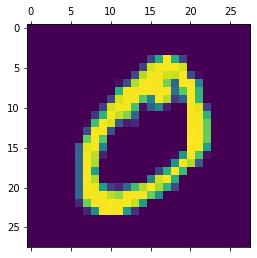

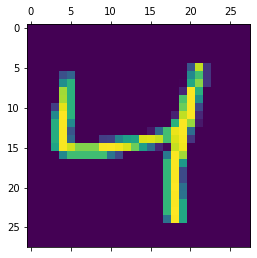

In [53]:
for i in range(1, 3): plt.matshow(X_train2[i])

In [63]:
model = keras.models.Sequential([keras.layers.Conv2D(64, 5, activation='relu', input_shape=[28,28,1], padding="same"),
                                 keras.layers.MaxPooling2D(),
                                 keras.layers.Conv2D(128, 3, 2, activation='relu', padding="same"),
                                 keras.layers.MaxPooling2D(),
                                 keras.layers.Conv2D(256, 2, 2, activation='relu', padding="same"),
                                 keras.layers.MaxPooling2D(),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(128, activation='relu'),
                                 keras.layers.Dropout(0.5),
                                 keras.layers.Dense(64, activation='relu'),
                                 keras.layers.Dropout(0.5),
                                 keras.layers.Dense(10, activation="softmax")])

In [64]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [65]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [66]:
history = model.fit(X_train2, y_train, validation_split=0.18, callbacks=[early_stopping_cb], epochs=50)

Epoch 1/50
1538/1538 [==============================] - 33s 21ms/step - loss: 1.9201 - accuracy: 0.4555 - val_loss: 0.1342 - val_accuracy: 0.9653
Epoch 2/50
1538/1538 [==============================] - 32s 21ms/step - loss: 0.3453 - accuracy: 0.9010 - val_loss: 0.1318 - val_accuracy: 0.9627
Epoch 3/50
1538/1538 [==============================] - 32s 21ms/step - loss: 0.2214 - accuracy: 0.9388 - val_loss: 0.1057 - val_accuracy: 0.9744
Epoch 4/50
1538/1538 [==============================] - 33s 21ms/step - loss: 0.1793 - accuracy: 0.9531 - val_loss: 0.0921 - val_accuracy: 0.9776
Epoch 5/50
1538/1538 [==============================] - 33s 22ms/step - loss: 0.1645 - accuracy: 0.9586 - val_loss: 0.0920 - val_accuracy: 0.9794
Epoch 6/50
1538/1538 [==============================] - 33s 21ms/step - loss: 0.1297 - accuracy: 0.9671 - val_loss: 0.0765 - val_accuracy: 0.9830
Epoch 7/50
1538/1538 [==============================] - 33s 21ms/step - loss: 0.1198 - accuracy: 0.9702 - val_loss: 0.0648 -

In [68]:
preds = model.predict(X_test2)

In [81]:
preds2 = []
for row in preds: preds2.append(np.argmax(row))

In [87]:
score = 0
for u, v in zip(preds2, y_test): score += int(u==v)
score/10000

0.9846